# Statistical Power

Author: Greg Damico.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

The power of a statistical test is simply P(reject null | null is false). That is, a test's power grows with the chance that we shall accurately reject the null hypothesis.

If $\beta$ is the probability of a false negative, i.e. the probability that we fail to reject the null hypothesis when it is false, then clearly the power of an associated test is simply $1 - \beta$.

## Example of Power Growing with Sample Size
Consider some particular null hypothesis to the effect that Hepomanol, an experimental drug, has no effect in the treatment of liver cancer. And suppose in fact that this hypothesis is false. A typical test for the effectiveness of Hepomanol would involve patients with liver cancer taking both Hepomanol and a placebo. Some patients would show amelioration of symptoms and others would not. Given that the null hypothesis is false, we ought to expect to see a correlation between those who took Hepomanol and those who experienced relief of symptoms. But the probability that we might, by random chance, see _no_ correlation is higher for smaller sample sizes. The more patients we test, the more likely we are to observe the actually existing correlation. Thus, all else equal, tests involving larger samples will have higher degrees of power.

Suppose in particular that we have the following data about our liver cancer patients.

1. The average tumor length for those given a placebo is 5 cm.
2. The tumor lengths for the ten patients given Hepomanol are:

5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25

Hepomanol has in fact had great success, and so we'll assume that the null hypothesis is in fact false.

Our statistical test will take the form of sampling from this population of ten. We'll see that the larger the sample is, the greater is the power of the test.

We'll be using a t-test here, so we'll need to have access to t-critical values: We'll use scipy.stats.t for those.

We'll also need the standard deviation of our sample.

In [2]:
# Calculating the power of a statistical test:


data = pd.Series([5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25])

In [3]:
stats.t.ppf(0.95, 1)

6.313751514800932

Suppose we only take 2 samples. In that case, with a one-tail test with 5% threshold, there's only one degree of freedom and so our critical value is -6.31. So our chance of rejecting the null hypothesis is just the chance that our statistic $t\leq -6.31$.

t is calculated as follows: $\Large\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$.


There are $10\choose 2$ ($=45$) ways of selecting two data points from a population of ten. The loop below counts the number of times that we would reject the null hypothesis. Thus we can calculate the power of our test by simply taking that number and dividing by $45$.

In [4]:
ctr = 0
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        if np.std([data[i], data[j]]) != 0:
            if (np.mean([data[i], data[j]]) - 5) / (np.std([data[i], data[j]]) / 2 ** 0.5) <= -6.31:
                ctr += 1
        else:
            if data[i] == 5:
                pass
            else:
                ctr += 1
power = ctr / 45
power

0.6222222222222222

What about for sample size of three?

In [5]:
stats.t.ppf(0.95, 2)

2.919985580355516

In [6]:
ctr = 0
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        for k in range(j + 1, len(data)):
            if np.std([data[i], data[j], data[k]]) != 0:
                if (np.mean([data[i], data[j], data[k]]) - 5) / (np.std([data[i], data[j], data[k]]) / 3 ** 0.5) <= -2.92:
                    ctr += 1
            else:
                if data[i] == 5:
                    pass
                else:
                    ctr += 1
power = ctr / 120
power

0.4666666666666667

Let's just write a function already that will calculate the statistical power of our test for _any_ sample size and _any_ data!

In [7]:
def stat_power(n, obs=data):
    ctr = 0
    combs = list(itertools.combinations(obs, n))
    for sample in combs:
        if np.std(sample) != 0:
            if (np.mean(sample) - 5) / (np.std(sample) / n ** 0.5) <= -stats.t.ppf(0.95, df=n-1):
                ctr += 1
        else:
            if sample[0] == 5:
                pass
            else:
                ctr += 1
    power = ctr / len(combs)
    return power

In [10]:
stat_power(2, obs=pd.Series([5, 2, 2, 5, 2.5, 2, 2, 3, 2.5, 2.25,
                            4, 1, 1.5, 2, 3, 2.75, 2, 2.1, 6, 1.25]))

0.5789473684210527

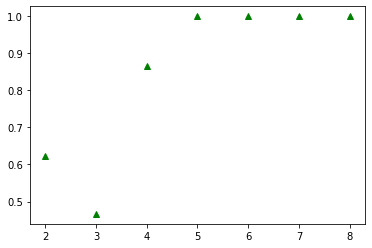

In [11]:
# Plotting

from matplotlib import pyplot as plt
%matplotlib inline

X = range(2, 9)
y = [stat_power(i) for i in X]

plt.plot(X, y, 'g^');